In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import pos_tag
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
# nltk.download('averaged_perceptron_tagger')
# nltk.download('universal_tagset')


In [19]:
df = pd.read_csv('./db_cat.csv', index_col=0).dropna(axis=0)
df

,url,title,content,cat
0,https://stackoverflow.com/questions/2081586/we...,Web scraping with Python - Stack Overflow,Teams Q&A for work Connect and share knowledge...,0
1,https://stackoverflow.com/questions/2081586/we...,Web scraping with Python - Stack Overflow,Teams Q&A for work Connect and share knowledge...,1
2,https://stackoverflow.com/talent,Reach the world’s largest collection of tech t...,Teams Q&A for work Connect and share knowledge...,1
3,https://stackoverflow.co/,Empowering the world to develop technology thr...,\n Our asynchronous knowledge managem...,1
4,https://apple.stackexchange.com/questions/4376...,Why is Homebrew installed in /opt/homebrew on ...,Ask Different is a question and answer site fo...,1
...,...,...,...,...
3197,https://stackoverflow.com/legal/privacy-policy,Privacy Policy - Stack Overflow,Teams Q&A for work Connect and share knowledge...,0
3198,https://stackoverflow.com/users/signup?ssrc=si...,Sign Up - Stack Overflow,Teams Q&A for work Connect and share knowledge...,0
3199,https://optout.networkadvertising.org/?c=1,{{ $root.title }},Try Again - Learn More,1
3200,https://support.google.com/google-ads/answer/2...,About similar segments on the Display Network ...,Similar segments is a targeting feature that u...,0


Repetindo a extração de entidades nomeadas, baseado na categoria

In [22]:
def prepro(word: str) -> str:
    try:
        o = re.sub("[\s|\n|\W]+", " ", word)
        o = ' '.join([i.lower() for i in o.split(' ') if not i.isdigit()])
        return o
    except TypeError:
        print("TYPE ERROR ON INPUT: ", word)

df['content'] = df['content'].apply(prepro)

X_0 = list(df[df['cat'] == 0]['content'])
X_1 = list(df[df['cat'] == 1]['content'])

pos_in_0 = " ".join(X_0)
pos_output_0 = pos_tag(pos_in_0.split(' '), lang="eng", tagset="universal")
pos_output_0[:100]

[('teams', 'NOUN'),
 ('q', 'VERB'),
 ('a', 'DET'),
 ('for', 'ADP'),
 ('work', 'NOUN'),
 ('connect', 'NOUN'),
 ('and', 'CONJ'),
 ('share', 'NOUN'),
 ('knowledge', 'NOUN'),
 ('within', 'ADP'),
 ('a', 'DET'),
 ('single', 'ADJ'),
 ('location', 'NOUN'),
 ('that', 'DET'),
 ('is', 'VERB'),
 ('structured', 'VERB'),
 ('and', 'CONJ'),
 ('easy', 'ADJ'),
 ('to', 'PRT'),
 ('search', 'VERB'),
 ('want', 'NOUN'),
 ('to', 'PRT'),
 ('improve', 'VERB'),
 ('this', 'DET'),
 ('question', 'NOUN'),
 ('update', 'VERB'),
 ('the', 'DET'),
 ('question', 'NOUN'),
 ('so', 'ADP'),
 ('it', 'PRON'),
 ('s', 'VERB'),
 ('on', 'ADP'),
 ('topic', 'NOUN'),
 ('for', 'ADP'),
 ('stack', 'NOUN'),
 ('overflow', 'NOUN'),
 ('closed', 'VERB'),
 ('years', 'NOUN'),
 ('ago', 'ADV'),
 ('i', 'VERB'),
 ('d', 'VERB'),
 ('like', 'ADP'),
 ('to', 'PRT'),
 ('grab', 'VERB'),
 ('daily', 'ADJ'),
 ('sunrise', 'NOUN'),
 ('sunset', 'NOUN'),
 ('times', 'NOUN'),
 ('from', 'ADP'),
 ('a', 'DET'),
 ('web', 'ADJ'),
 ('site', 'NOUN'),
 ('is', 'VERB'),
 ('

In [23]:
pos_in_1 = " ".join(X_1)
pos_output_1 = pos_tag(pos_in_1.split(' '), lang="eng", tagset="universal")
pos_output_1[:100]

[('teams', 'NOUN'),
 ('q', 'VERB'),
 ('a', 'DET'),
 ('for', 'ADP'),
 ('work', 'NOUN'),
 ('connect', 'NOUN'),
 ('and', 'CONJ'),
 ('share', 'NOUN'),
 ('knowledge', 'NOUN'),
 ('within', 'ADP'),
 ('a', 'DET'),
 ('single', 'ADJ'),
 ('location', 'NOUN'),
 ('that', 'DET'),
 ('is', 'VERB'),
 ('structured', 'VERB'),
 ('and', 'CONJ'),
 ('easy', 'ADJ'),
 ('to', 'PRT'),
 ('search', 'VERB'),
 ('want', 'NOUN'),
 ('to', 'PRT'),
 ('improve', 'VERB'),
 ('this', 'DET'),
 ('question', 'NOUN'),
 ('update', 'VERB'),
 ('the', 'DET'),
 ('question', 'NOUN'),
 ('so', 'ADP'),
 ('it', 'PRON'),
 ('s', 'VERB'),
 ('on', 'ADP'),
 ('topic', 'NOUN'),
 ('for', 'ADP'),
 ('stack', 'NOUN'),
 ('overflow', 'NOUN'),
 ('closed', 'VERB'),
 ('years', 'NOUN'),
 ('ago', 'ADV'),
 ('i', 'VERB'),
 ('d', 'VERB'),
 ('like', 'ADP'),
 ('to', 'PRT'),
 ('grab', 'VERB'),
 ('daily', 'ADJ'),
 ('sunrise', 'NOUN'),
 ('sunset', 'NOUN'),
 ('times', 'NOUN'),
 ('from', 'ADP'),
 ('a', 'DET'),
 ('web', 'ADJ'),
 ('site', 'NOUN'),
 ('is', 'VERB'),
 ('

In [24]:
tag_pattern ="ENTIDADE: {<DET|PRT>?<NOUN>+<PRT>?<NOUN>*}"
parser = nltk.RegexpParser(tag_pattern)
named_entities_0 = []
for p in parser.parse(pos_output_0):
    try:
        if (p.label()=="ENTIDADE"):
            named_entities_0.append(' '.join([i[0] for i in p.leaves()]))
    except AttributeError:
        continue

named_entities_1 = []
for p in parser.parse(pos_output_1):
    try:
        if (p.label()=="ENTIDADE"):
            named_entities_1.append(' '.join([i[0] for i in p.leaves()]))
    except AttributeError:
        continue

In [25]:
vec_0 = CountVectorizer(vocabulary=set(named_entities_0),ngram_range=(2,4))
X_0 = vec_0.fit_transform([pos_in_0])
total_freq = X_0.sum(axis=0)
wf_0 = {}
for k, v in vec_0.vocabulary_.items():
    wf_0[k] = total_freq[0,v]

vec_1 = CountVectorizer(vocabulary=set(named_entities_1),ngram_range=(2,4))
X_1 = vec_1.fit_transform([pos_in_1])
total_freq = X_1.sum(axis=0)
wf_1 = {}
for k, v in vec_1.vocabulary_.items():
    wf_1[k] = total_freq[0,v]

d:\Python\lib\site-packages\sklearn\feature_extraction\text.py:1322: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [26]:
wf_0 = {k: v for k, v in sorted(wf_0.items(), key=lambda item: item[1], reverse = True)}
words_0 = list(wf_0.keys())
x_0 = []
y_0 = []

wf_1 = {k: v for k, v in sorted(wf_1.items(), key=lambda item: item[1], reverse = True)}
words_1 = list(wf_1.keys())
x_1 = []
y_1 = []

for i in range(40):
    # print(f"Palavra: '{words_0[i]}'\t\tContagem: {wf_0[words_0[i]]}")
    x_0.append(words_0[i])
    y_0.append(wf_0[words_0[i]])
    x_1.append(words_1[i])
    y_1.append(wf_1[words_1[i]])

Analisando as categorias separadamente

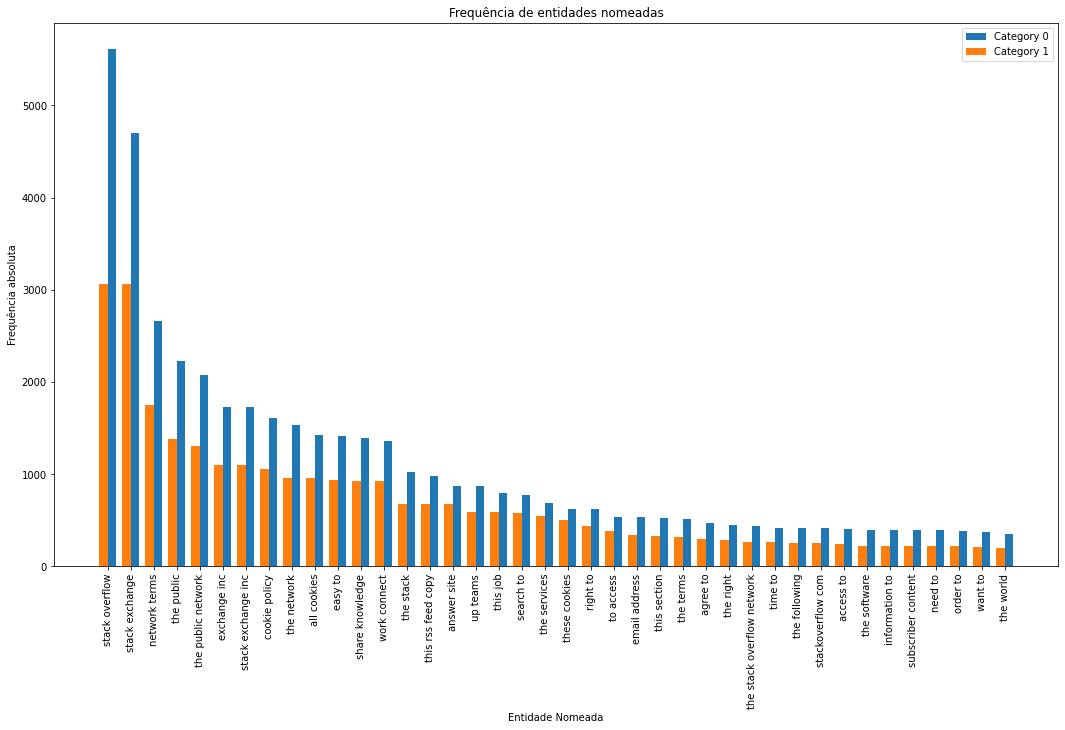

In [34]:
W = 0.35
plt.figure(figsize=(18,10))
plt.bar(np.array(range(len(y_0)))+W/2, (y_0), width=W, label='Category 0')
plt.bar(np.array(range(len(y_1)))-W/2, (y_1), width=W, label='Category 1')
plt.xticks(range(len(y_0)), x_0, rotation=90)
plt.ylabel("Frequência absoluta")
plt.xlabel("Entidade Nomeada")
plt.title("Frequência de entidades nomeadas")
plt.legend()
plt.show()

Pelo gráfico acima, parece que a categorização não foi muito bem sucedida, já que os dois grupos apresentam essencialmente a mesma distirbuição. Inspecionando os dados coletados, é possível perceber que na verdade existem muitas páginas inúteis, e que na realidade essa base não é muito boa. Só para validar os modelos e técnicas usadas, baixei um dataset simples de sentimento no twitter no Kaggle: https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset

In [42]:
df_s = pd.read_csv('./Tweets.csv', index_col = 'textID').dropna(axis=0)
df_s

,text,selected_text,sentiment
textID,,,
cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
088c60f138,my boss is bullying me...,bullying me,negative
9642c003ef,what interview! leave me alone,leave me alone,negative
358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...
4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive


In [47]:
#Slight change to keep '****', since it is what replaces swearing, which might be interesting to keep
def prepro(word: str) -> str:
    try:
        o = re.sub("[\s|\n|!|@|#|$|%|`]+", " ", word)
        o = ' '.join([i.lower() for i in o.split(' ') if not i.isdigit()])
        return o
    except TypeError:
        print("TYPE ERROR ON INPUT: ", word)

df_s['text_pro'] = df_s['text'].apply(prepro)
df_s

,text,selected_text,sentiment,text_pro
textID,,,,
cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"i d have responded, if i were going"
549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad i will miss you here in san diego
088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me...
9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone
358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"sons of ****, why couldn t they put them on t..."
...,...,...,...,...
4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,wish we could come see u on denver husband lo...
4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,i ve wondered about rake to. the client has m...
f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,yay good for both of you. enjoy the break - y...


In [48]:
# Put in function to facilitate
def extract_named_entities(X_0):
    pos_in_0 = " ".join(X_0)
    pos_output_0 = pos_tag(pos_in_0.split(' '), lang="eng", tagset="universal")
    #pos_output_0[:100]
    tag_pattern ="ENTIDADE: {<DET|PRT>?<NOUN>+<PRT>?<NOUN>*}"
    parser = nltk.RegexpParser(tag_pattern)
    named_entities_0 = []
    for p in parser.parse(pos_output_0):
        try:
            if (p.label()=="ENTIDADE"):
                named_entities_0.append(' '.join([i[0] for i in p.leaves()]))
        except AttributeError:
            continue

    vec_0 = CountVectorizer(vocabulary=set(named_entities_0),ngram_range=(2,4))
    X_0 = vec_0.fit_transform([pos_in_0])
    total_freq = X_0.sum(axis=0)
    wf_0 = {}
    for k, v in vec_0.vocabulary_.items():
        wf_0[k] = total_freq[0,v]

    wf_0 = {k: v for k, v in sorted(wf_0.items(), key=lambda item: item[1], reverse = True)}
    words_0 = list(wf_0.keys())
    x_0 = []
    y_0 = []

    for i in range(40):
        # print(f"Palavra: '{words_0[i]}'\t\tContagem: {wf_0[words_0[i]]}")
        x_0.append(words_0[i])
        y_0.append(wf_0[words_0[i]])
    return x_0, y_0

In [50]:
x_pos, y_pos = extract_named_entities(list(df_s[df_s['sentiment'] == 'positive']['text_pro']))
x_neut, y_neut = extract_named_entities(list(df_s[df_s['sentiment'] == 'neutral']['text_pro']))
x_neg, y_neg = extract_named_entities(list(df_s[df_s['sentiment'] == 'negative']['text_pro']))

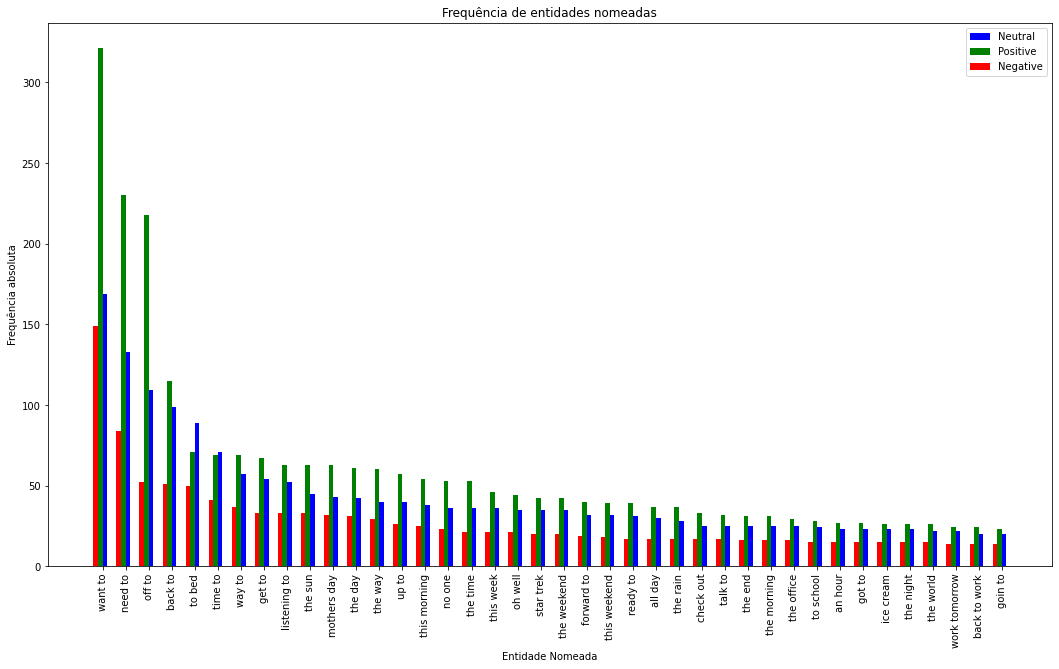

In [52]:
W = 0.2
plt.figure(figsize=(18,10))
plt.bar(np.array(range(len(y_neut)))+W/2, (y_neut), width=W, label='Neutral', color='b')
plt.bar(np.array(range(len(y_pos)))-W/2, (y_pos), width=W, label='Positive', color='g')
plt.bar(np.array(range(len(y_neg)))-3*W/2, (y_neg), width=W, label='Negative', color='r')
plt.xticks(range(len(y_neut)), x_neut, rotation=90)
plt.ylabel("Frequência absoluta")
plt.xlabel("Entidade Nomeada")
plt.title("Frequência de entidades nomeadas")
plt.legend()
plt.show()

De forma geral, esse dataset apresenta características semelhantes em termos de distribuição. Me parece que as entidades nomeadas não ficaram muito boas nesse contexto. Não parece ter nada muito bem definido. Existem coisas como star trek, que é uma entidade, mas também coisas como 'to bed' que não são.